# Data Exploration
- Our datasets came from the US census 
- We used both historical data of ecommerce in the US in addition to five state's ecommerce data from 2017
- We chose five states that represented all regions of the US:
    -  California (Southwest Coast)
    -  Arizona (South west)
    -  Florida (South)
    -  Indiana (Midwest)
    -  Pennsylvania (Northeast)

In [1]:
# Dependencies
import pandas as pd
import numpy as np
import os
import webbrowser
import io
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Save file path to variable
retail_history_csv = "Datasets/Estimated Annual U.S. Retail Trade Sales Total and E-commerce1- 1998-2018.csv"
US_totalrev_2018_2017_csv = "Datasets/US_Retail_Trade_Sales_2018_2017.csv"

# Dataset Clean-up 
-  (Retail History 2018-1998)

In [3]:
# Read with pandas
retail_history_df = pd.read_csv(retail_history_csv)

,NAICS Code,Unnamed: 1,2018,Unnamed: 3,2017r,Unnamed: 5,2016r,Unnamed: 7,2015r,Unnamed: 9,...,2002,Unnamed: 35,2001,Unnamed: 37,2000,Unnamed: 39,1999,Unnamed: 41,1998,Unnamed: 43
0,NaN,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,...,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,NaN,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188",...,"3,128,552","44,623","3,062,268","34,260","2,983,276","27,608","2,803,090","14,490","2,581,762","4,984"
2,441.0,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145",...,"818,811","7,059","815,579","5,271","796,210","4,090","764,204","1,704","688,415",382
3,442.0,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,...,"94,438",S,"91,484",S,"91,170",S,"84,294",S,"77,412",S
4,443.0,Electronics and appliance stores,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930",...,"91,208",NaN,"88,493",NaN,"90,422",NaN,"87,363",NaN,"82,731",NaN


In [4]:
# Rename Columns
retail_history_df = retail_history_df.rename(columns={"Unnamed: 1": "Kind_of_Business",
                                 "2018": "2018 Total",
                                 "Unnamed: 3": "2018 Ecommerce Total",
                                 "2017r": "2017 Total",
                                 "Unnamed: 5": "2017 Ecommerce Total",
                                 "2016r": "2016 Total",
                                 "Unnamed: 7": "2016 Ecommerce Total",
                                 "2015r": "2015 Total",
                                 "Unnamed: 9": "2015 Ecommerce Total",
                                 "2014r": "2014 Total",
                                 "Unnamed: 11": "2014 Ecommerce Total",
                                 "1998": "1998 Total",
                                 "Unnamed: 43": "1998 Ecommerce Total"
                                 })

In [5]:
# Drop columns we do not need
retail_history_df = retail_history_df.drop(columns=['NAICS Code',
                                                    '2013r',
                                                    'Unnamed: 13',
                                                    '2012r',
                                                    'Unnamed: 15',
                                                    '2011r',
                                                    'Unnamed: 17',
                                                    '2010',
                                                     'Unnamed: 19',
                                                     '2009',
                                                     'Unnamed: 21',
                                                     '2008',
                                                     'Unnamed: 23',
                                                     '2007',
                                                     'Unnamed: 25',
                                                     '2006',
                                                     'Unnamed: 27',
                                                     '2005',
                                                     'Unnamed: 29',
                                                     '2004',
                                                     'Unnamed: 31',
                                                     '2003',
                                                     'Unnamed: 33',
                                                     '2002',
                                                     'Unnamed: 35',
                                                     '2001',
                                                     'Unnamed: 37',
                                                     '2000',
                                                     'Unnamed: 39',
                                                     '1999',
                                                     'Unnamed: 41',
                                                    '2004', 
                                                    'Unnamed: 31',
                                                    '2003', 
                                                    'Unnamed: 33',
                                                    '2002',
                                                    'Unnamed: 35',
                                                    '2001',
                                                    'Unnamed: 37',
                                                    '2000',
                                                    'Unnamed: 39',
                                                    '1999',
                                                    'Unnamed: 41',
                                                   
                                                   ])

In [7]:
retail_history_df

,Kind_of_Business,2018 Total,2018 Ecommerce Total,2017 Total,2017 Ecommerce Total,2016 Total,2016 Ecommerce Total,2015 Total,2015 Ecommerce Total,2014 Total,2014 Ecommerce Total,1998 Total,1998 Ecommerce Total
0,Kind of Business,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce,Total,E-commerce
1,Total Retail Trade,"5,269,468","519,635","5,053,151","458,916","4,852,958","397,252","4,725,993","346,188","4,639,440","302,485","2,581,762","4,984"
2,Motor vehicle and parts dealers,"1,191,321","35,348","1,172,367","32,106","1,140,614","30,739","1,094,112","30,145","1,020,851","27,678","688,415",382
3,Furniture and home furnishings stores,"116,895","1,533","113,035","1,279","110,404","1,081","106,570",996,"99,718",793,"77,412",S
4,Electronics and appliance stores,"100,205","2,056","98,570","2,113","99,043","2,069","103,658","1,930","105,197","1,780","82,731",NaN
5,Building mat. and garden equip. and supplies d...,"381,313","2,795","365,622","2,614","348,697","2,327","331,611","1,939","318,352",S,"202,423",25
6,Food and beverage stores,"745,736","4,837","725,137","3,431","699,349","2,371","685,381","1,843","669,165","1,596","416,525",10
7,Health and personal care stores,"347,454",744,"333,338",S,"327,153",D,"315,244",D,"299,263",D,"129,583",S
8,Gasoline stations,"503,925",S,"459,463",S,"422,792",D,"444,027",D,"538,790",D,"191,727",S
9,Clothing and clothing access. Stores,"268,163","10,981","260,566","9,374","260,050","8,134","255,798","6,970","250,409","5,717","149,151",12


- D - Denotes an estimate withheld to avoid disclosing data of individual companies; data are included in higher-level totals.
- S - Estimate does not meet publication standards because of high sampling variability (coefficient of variation is greater than 30%), poor response quality (total quantity response rate is less than 50%), or other concerns about the estimate's quality. Unpublished estimates derived from this table by subtraction are subject to these same limitations and should not be attributed to the U.S. Census Bureau. For a description of publication standards and the total quantity response rate, see https://www.census.gov/about/policies/quality/standards/standardf1.html.

- Estimates are shown in millions of dollars and are based on data from the Annual Retail Trade Survey. Estimates have been adjusted using final results of the 2012 Economic Census.

In [8]:
# Drop rows that do not have ecommerce data
retail_history_df = retail_history_df.drop([0, 8])

In [9]:
retail_history_df = retail_history_df.reset_index(drop=True)

In [10]:
retail_history_df = retail_history_df.set_index('Kind_of_Business')

In [12]:
# Replaced S & D, final DataFrame
retail_history_df = retail_history_df.replace({'S': '0',
                                               'D': '0',
                                              })

In [13]:
# remove commas from dataframe
retail_history_df.replace(',','', regex=True, inplace=True)

In [14]:
# reset index 
retail_history_df = retail_history_df.reset_index()

In [16]:
# Used the melt function to switch columns and rows of dataframe
retail_historymelted_df = retail_history_df.melt(id_vars=['Kind_of_Business'])
retail_historymelted_df

,Kind_of_Business,variable,value
0,Total Retail Trade,2018 Total,5269468
1,Motor vehicle and parts dealers,2018 Total,1191321
2,Furniture and home furnishings stores,2018 Total,116895
3,Electronics and appliance stores,2018 Total,100205
4,Building mat. and garden equip. and supplies d...,2018 Total,381313
...,...,...,...
151,"Sporting goods, hobby, musical instrument, and...",1998 Ecommerce Total,NaN
152,General merchandise stores,1998 Ecommerce Total,0
153,Miscellaneous store retailers,1998 Ecommerce Total,116
154,Nonstore retailers,1998 Ecommerce Total,4029


In [42]:
# Created two new columns by locating total and ecommerce total values from variable columns 
retail_historymelted_df.loc[retail_historymelted_df['variable'].str.contains('Total', case=False), 'Type']= 'Retail Total'
retail_historymelted_df.loc[retail_historymelted_df['variable'].str.contains('Ecommerce Total', case=False),'Type']= 'Ecommerce'

In [40]:
# Looking for only numbers - reg.ex = regular expression.
retail_historymelted_df['Year'] = retail_historymelted_df['variable'].str.extract('(\d+)', expand=False)
retail_historymelted_df['Year'] = retail_historymelted_df['Year'].astype(int)
retail_historymelted_df['value'] = retail_historymelted_df['value'].astype(float)

In [41]:
retail_historymelted_df

,Kind_of_Business,variable,value,Type,Year
0,Total Retail Trade,2018 Total,5269468.0,Retail Total,2018
1,Motor vehicle and parts dealers,2018 Total,1191321.0,Retail Total,2018
2,Furniture and home furnishings stores,2018 Total,116895.0,Retail Total,2018
3,Electronics and appliance stores,2018 Total,100205.0,Retail Total,2018
4,Building mat. and garden equip. and supplies d...,2018 Total,381313.0,Retail Total,2018
...,...,...,...,...,...
151,"Sporting goods, hobby, musical instrument, and...",1998 Ecommerce Total,NaN,Ecommerce,1998
152,General merchandise stores,1998 Ecommerce Total,0.0,Ecommerce,1998
153,Miscellaneous store retailers,1998 Ecommerce Total,116.0,Ecommerce,1998
154,Nonstore retailers,1998 Ecommerce Total,4029.0,Ecommerce,1998


# State Data Cleanup

In [84]:
PA_Data_csv = "Datasets/PA Retail Data.csv"
IN_Data_csv = "Datasets/Indiana Retail Trade Data.csv"
AZ_retail_csv = "Datasets/AZ Retail Data.csv"
CA_retail_csv = "Datasets/CA Retail Data.csv"
FL_retail_csv = "Datasets/Florida Retail Data.csv"

# Pennsylvania

In [87]:
# Read with pandas
PA_Data_df = pd.read_csv(PA_Data_csv)
PA_Data_df.head()

,id,Geo Footnote,Geographic Area Name,2017 NAICS code,2017 NAICS Footnote,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Annual payroll ($1,000)","First-quarter payroll ($1,000)",Number of employees,"Range indicating percent of total sales, value of shipments, or revenue imputed",Range indicating percent of total annual payroll imputed,Range indicating percent of total employees imputed
0,0400000US42,NaN,Pennsylvania,44-45,NaN,Retail trade,2017,25427,42514,234836340,17354005,4221872,662560,Less than 10%,10% to less than 20%,20% to less than 30%
1,0400000US42,NaN,Pennsylvania,441,NaN,Motor vehicle and parts dealers,2017,3455,4796,45990378,3450296,825940,84065,10% to less than 20%,10% to less than 20%,10% to less than 20%
2,0400000US42,NaN,Pennsylvania,442,NaN,Furniture and home furnishings stores,2017,1252,1942,3839462,496470,118744,16970,10% to less than 20%,10% to less than 20%,20% to less than 30%
3,0400000US42,NaN,Pennsylvania,443,NaN,Electronics and appliance stores,2017,733,1172,2669309,322363,80998,11985,10% to less than 20%,20% to less than 30%,10% to less than 20%
4,0400000US42,NaN,Pennsylvania,444,NaN,Building material and garden equipment and sup...,2017,2189,3168,12886105,1492989,349910,49809,Less than 10%,Less than 10%,Less than 10%


In [88]:
# Delete extraneous column
PA_Data_df = PA_Data_df.drop(columns=['Geo Footnote', '2017 NAICS Footnote', 'id', '2017 NAICS code', 
                            'Annual payroll ($1,000)', 'First-quarter payroll ($1,000)', 
                            'Number of employees', 'Range indicating percent of total annual payroll imputed', 
                            'Range indicating percent of total employees imputed', 
                           ])


PA_Data_df

,Geographic Area Name,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Range indicating percent of total sales, value of shipments, or revenue imputed"
0,Pennsylvania,Retail trade,2017,25427,42514,234836340,Less than 10%
1,Pennsylvania,Motor vehicle and parts dealers,2017,3455,4796,45990378,10% to less than 20%
2,Pennsylvania,Furniture and home furnishings stores,2017,1252,1942,3839462,10% to less than 20%
3,Pennsylvania,Electronics and appliance stores,2017,733,1172,2669309,10% to less than 20%
4,Pennsylvania,Building material and garden equipment and sup...,2017,2189,3168,12886105,Less than 10%
...,...,...,...,...,...,...,...
158,Pennsylvania,All other miscellaneous store retailers (excep...,2017,747,937,675185,10% to less than 20%
159,Pennsylvania,Electronic shopping and mail-order houses,2017,1229,1262,61728619,Less than 10%
160,Pennsylvania,Vending machine operators,2017,141,169,409314,Less than 10%
161,Pennsylvania,Fuel dealers,2017,458,620,2851961,20% to less than 30%


In [89]:
PA_Data_df = PA_Data_df.replace({'D': '0'})

In [90]:
PA_Data_df.loc[PA_Data_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
PA_Data_df.loc[PA_Data_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

In [91]:
PA_Data_df['Sales, value of shipments, or revenue ($1,000)'] = PA_Data_df['Sales, value of shipments, or revenue ($1,000)'].astype(float)

In [101]:
PA_ecommerce_totals = PA_Data_df.groupby('eCommerce?')['Sales, value of shipments, or revenue ($1,000)'].sum()
PA_ecommerce_totals

eCommerce?
0.0    988995843.0
1.0    185185857.0
Name: Sales, value of shipments, or revenue ($1,000), dtype: float64

# Indiana

In [95]:
# Read with pandas
IN_Data_df = pd.read_csv(IN_Data_csv)
IN_Data_df.head()

,id,Geo Footnote,Geographic Area Name,2017 NAICS code,2017 NAICS Footnote,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Annual payroll ($1,000)","First-quarter payroll ($1,000)",Number of employees,"Range indicating percent of total sales, value of shipments, or revenue imputed",Range indicating percent of total annual payroll imputed,Range indicating percent of total employees imputed
0,0400000US18,NaN,Indiana,44-45,NaN,Retail trade,2017,12047,21327,102106020,8660066,2121834,336615,Less than 10%,10% to less than 20%,10% to less than 20%
1,0400000US18,NaN,Indiana,441,NaN,Motor vehicle and parts dealers,2017,2004,2818,23316901,1815912,432882,43510,Less than 10%,10% to less than 20%,10% to less than 20%
2,0400000US18,NaN,Indiana,442,NaN,Furniture and home furnishings stores,2017,719,996,1895350,244150,59599,8449,20% to less than 30%,10% to less than 20%,20% to less than 30%
3,0400000US18,NaN,Indiana,443,NaN,Electronics and appliance stores,2017,403,618,1485385,159721,38660,6337,Less than 10%,10% to less than 20%,10% to less than 20%
4,0400000US18,NaN,Indiana,444,NaN,Building material and garden equipment and sup...,2017,1153,1783,8856566,941172,233190,31961,Less than 10%,Less than 10%,Less than 10%


In [96]:
# Delete extraneous column
IN_Data_df = IN_Data_df.drop(columns=['Geo Footnote', '2017 NAICS Footnote', 'id', '2017 NAICS code', 
                            'Annual payroll ($1,000)', 'First-quarter payroll ($1,000)', 
                            'Number of employees', 'Range indicating percent of total annual payroll imputed', 
                            'Range indicating percent of total employees imputed', 
                           ])

In [97]:
IN_Data_df = IN_Data_df.replace({'D': '0'})

In [98]:
IN_Data_df.loc[IN_Data_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
IN_Data_df.loc[IN_Data_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0


In [99]:
IN_Data_df['Sales, value of shipments, or revenue ($1,000)'] = IN_Data_df['Sales, value of shipments, or revenue ($1,000)'].astype(float)

In [102]:
IN_ecommerce_totals = IN_Data_df.groupby('eCommerce?')['Sales, value of shipments, or revenue ($1,000)'].sum()
IN_ecommerce_totals

eCommerce?
0.0    479152687.0
1.0     31305159.0
Name: Sales, value of shipments, or revenue ($1,000), dtype: float64

# Arizona

In [106]:
# creating a data frame 
AZ_df = pd.read_csv(AZ_retail_csv) 
AZ_df.head()

,id,Geo Footnote,Geographic Area Name,2017 NAICS code,2017 NAICS Footnote,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Annual payroll ($1,000)","First-quarter payroll ($1,000)",Number of employees,"Range indicating percent of total sales, value of shipments, or revenue imputed",Range indicating percent of total annual payroll imputed,Range indicating percent of total employees imputed
0,0400000US04,NaN,Arizona,44-45,NaN,Retail trade,2017,9830,17918,104365600,9505481,2365502,324912,Less than 10%,10% to less than 20%,10% to less than 20%
1,0400000US04,NaN,Arizona,441,NaN,Motor vehicle and parts dealers,2017,1250,2059,25808220,2192296,534080,44267,Less than 10%,10% to less than 20%,10% to less than 20%
2,0400000US04,NaN,Arizona,442,NaN,Furniture and home furnishings stores,2017,621,959,2436003,310635,75007,9962,10% to less than 20%,10% to less than 20%,30% to less than 40%
3,0400000US04,NaN,Arizona,443,NaN,Electronics and appliance stores,2017,304,524,1798437,211244,47338,6436,Less than 10%,30% to less than 40%,20% to less than 30%
4,0400000US04,NaN,Arizona,444,NaN,Building material and garden equipment and sup...,2017,708,1087,5569365,638354,157251,23621,Less than 10%,Less than 10%,Less than 10%


In [107]:
AZ_df = AZ_df.replace({'D': '0'})

In [108]:
# Delete extraneous column
AZ_df = AZ_df.drop(columns=['Geo Footnote', '2017 NAICS Footnote', 'id', '2017 NAICS code', 
                            'Annual payroll ($1,000)', 'First-quarter payroll ($1,000)', 
                            'Number of employees', 'Range indicating percent of total annual payroll imputed', 
                            'Range indicating percent of total employees imputed', 
                           ])

In [109]:
AZ_df.loc[AZ_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
AZ_df.loc[AZ_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

In [110]:

AZ_df['Sales, value of shipments, or revenue ($1,000)'] = AZ_df['Sales, value of shipments, or revenue ($1,000)'].astype(float)

In [111]:

my_results_AZ = AZ_df.groupby('eCommerce?')['Sales, value of shipments, or revenue ($1,000)'].sum()
my_results_AZ

eCommerce?
0.0    475374381.0
1.0     39154503.0
Name: Sales, value of shipments, or revenue ($1,000), dtype: float64

# California

In [117]:
# creating a data frame 
CA_df = pd.read_csv(CA_retail_csv) 
CA_df.head()

,id,Geo Footnote,Geographic Area Name,2017 NAICS code,2017 NAICS Footnote,Meaning of NAICS code,Year,Number of firms,Number of establishments,"Sales, value of shipments, or revenue ($1,000)","Annual payroll ($1,000)","First-quarter payroll ($1,000)",Number of employees,"Range indicating percent of total sales, value of shipments, or revenue imputed",Range indicating percent of total annual payroll imputed,Range indicating percent of total employees imputed
0,0400000US06,NaN,California,44-45,NaN,Retail trade,2017,70307,108233,594861377,54229430,13218933,1723278,10% to less than 20%,10% to less than 20%,20% to less than 30%
1,0400000US06,NaN,California,441,NaN,Motor vehicle and parts dealers,2017,7052,10140,133804387,10570959,2539253,204691,10% to less than 20%,10% to less than 20%,10% to less than 20%
2,0400000US06,NaN,California,442,NaN,Furniture and home furnishings stores,2017,3521,5200,12843483,1622359,389572,49954,20% to less than 30%,20% to less than 30%,30% to less than 40%
3,0400000US06,NaN,California,443,NaN,Electronics and appliance stores,2017,2181,3404,12347002,1383482,329123,44072,Less than 10%,30% to less than 40%,20% to less than 30%
4,0400000US06,NaN,California,444,NaN,Building material and garden equipment and sup...,2017,4572,6628,34015449,3920472,941230,121000,Less than 10%,Less than 10%,Less than 10%


In [118]:
# Delete extraneous column
CA_df = CA_df.drop(columns=['Geo Footnote', '2017 NAICS Footnote', 'id', '2017 NAICS code', 
                            'Annual payroll ($1,000)', 'First-quarter payroll ($1,000)', 
                            'Number of employees', 'Range indicating percent of total annual payroll imputed', 
                            'Range indicating percent of total employees imputed', 
                           ])

In [119]:
CA_df.loc[CA_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
CA_df.loc[CA_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

In [122]:
CA_totals = CA_df.groupby('eCommerce?')['Sales, value of shipments, or revenue ($1,000)'].sum()
CA_totals

eCommerce?
0.0    2717305378
1.0     257001507
Name: Sales, value of shipments, or revenue ($1,000), dtype: int64

# Florida

In [125]:
# creating a data frame 
FL_df = pd.read_csv(FL_retail_csv)

In [126]:
# Delete extraneous column
FL_df = FL_df.drop(columns=['Geo Footnote', '2017 NAICS Footnote', 'id', '2017 NAICS code', 
                            'Annual payroll ($1,000)', 'First-quarter payroll ($1,000)', 
                            'Number of employees', 'Range indicating percent of total annual payroll imputed', 
                            'Range indicating percent of total employees imputed', 
                           ])

In [127]:
FL_df = FL_df.replace({'D': '0'})

In [128]:

FL_df.loc[FL_df['Meaning of NAICS code']=='Electronic shopping and mail-order houses', 'eCommerce?']= 1
FL_df.loc[FL_df['Meaning of NAICS code']!='Electronic shopping and mail-order houses', 'eCommerce?']= 0

In [129]:

FL_df['Sales, value of shipments, or revenue ($1,000)'] = FL_df['Sales, value of shipments, or revenue ($1,000)'].astype(int)

In [130]:
my_resultsFL = FL_df.groupby('eCommerce?')['Sales, value of shipments, or revenue ($1,000)'].sum()
my_resultsFL

eCommerce?
0.0    1566677507
1.0      72011274
Name: Sales, value of shipments, or revenue ($1,000), dtype: int64

# Plots

In [52]:
# 2018 Data
data_2018 = retail_historymelted_df[(retail_historymelted_df.Year == 2018) & (retail_historymelted_df.Type == 'Ecommerce')]
data_2018 = data_2018.nlargest(6, 'value')

# 2017 Data
data_2017 = retail_historymelted_df[(retail_historymelted_df.Year == 2017) & (retail_historymelted_df.Type == 'Ecommerce')]
data_2017 = data_2017.nlargest(6, 'value')

# 2016 Data
data_2016 = retail_historymelted_df[(retail_historymelted_df.Year == 2016) & (retail_historymelted_df.Type == 'Ecommerce')]
data_2016 = data_2016.nlargest(6, 'value')

# 2015 Data
data_2015 = retail_historymelted_df[(retail_historymelted_df.Year == 2015) & (retail_historymelted_df.Type == 'Ecommerce')]
data_2015 = data_2015.nlargest(6, 'value')

# 2014 Data
data_2014 = retail_historymelted_df[(retail_historymelted_df.Year == 2014) & (retail_historymelted_df.Type == 'Ecommerce')]
data_2014 = data_2014.nlargest(6, 'value')

# 1998 Data
data_1998 = retail_historymelted_df[(retail_historymelted_df.Year == 1998) & (retail_historymelted_df.Type == 'Ecommerce')]
data_1998 = data_1998.nlargest(6, 'value')

data_1998

,Kind_of_Business,variable,value,Type,Year
143,Total Retail Trade,1998 Ecommerce Total,4984.0,Ecommerce,1998
154,Nonstore retailers,1998 Ecommerce Total,4029.0,Ecommerce,1998
155,Electronic shopping and mail-order houses,1998 Ecommerce Total,4008.0,Ecommerce,1998
144,Motor vehicle and parts dealers,1998 Ecommerce Total,382.0,Ecommerce,1998
153,Miscellaneous store retailers,1998 Ecommerce Total,116.0,Ecommerce,1998
147,Building mat. and garden equip. and supplies d...,1998 Ecommerce Total,25.0,Ecommerce,1998


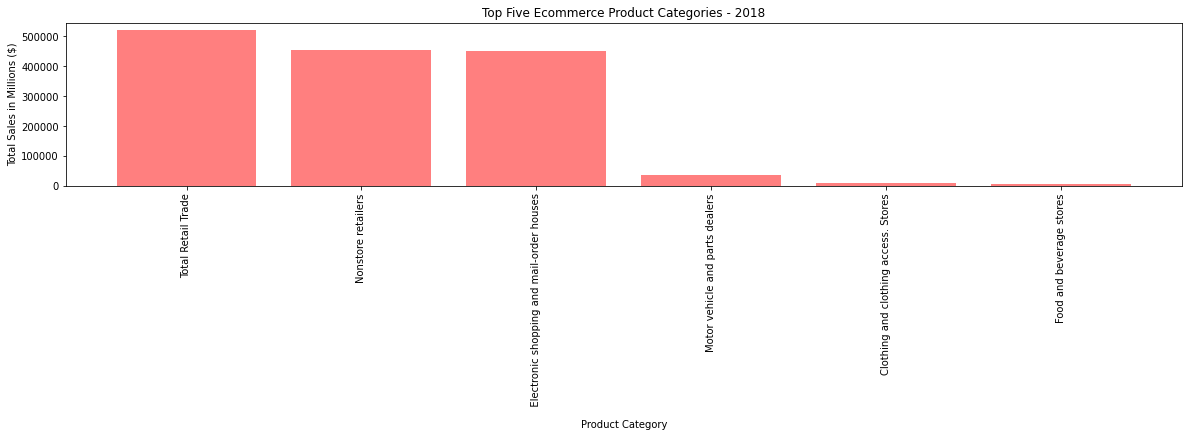

In [77]:
# Set x axis and tick locations
x_axis = np.arange(len(data_2018))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(20,3))
plt.bar(x_axis, data_2018["value"], color='r', alpha=0.5, align="edge")
plt.xticks(tick_locations, data_2018["Kind_of_Business"], rotation="vertical")

# Set a Title and labels
plt.title("Top Five Ecommerce Product Categories - 2018")
plt.xlabel("Product Category")
plt.ylabel("Total Sales in Millions ($)")
plt.savefig('Top Five Ecommerce Product Categories - 2018.png')

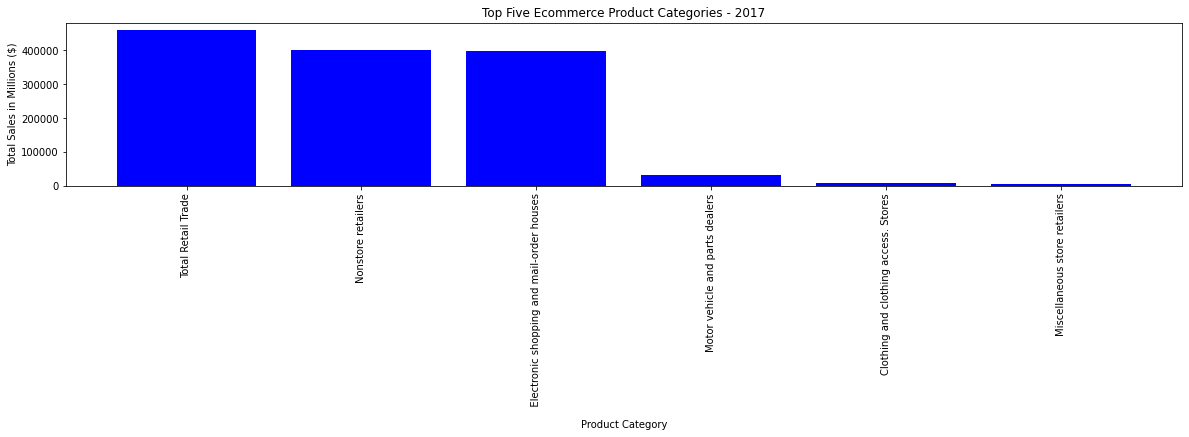

In [78]:
# Set x axis and tick locations
x_axis = np.arange(len(data_2017))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(20,3))
plt.bar(x_axis, data_2017["value"], color='b', alpha=1, align="edge")
plt.xticks(tick_locations, data_2017["Kind_of_Business"], rotation="vertical")

# Set a Title and labels
plt.title("Top Five Ecommerce Product Categories - 2017")
plt.xlabel("Product Category")
plt.ylabel("Total Sales in Millions ($)")
plt.savefig('Top Five Ecommerce Product Categories - 2017.png')

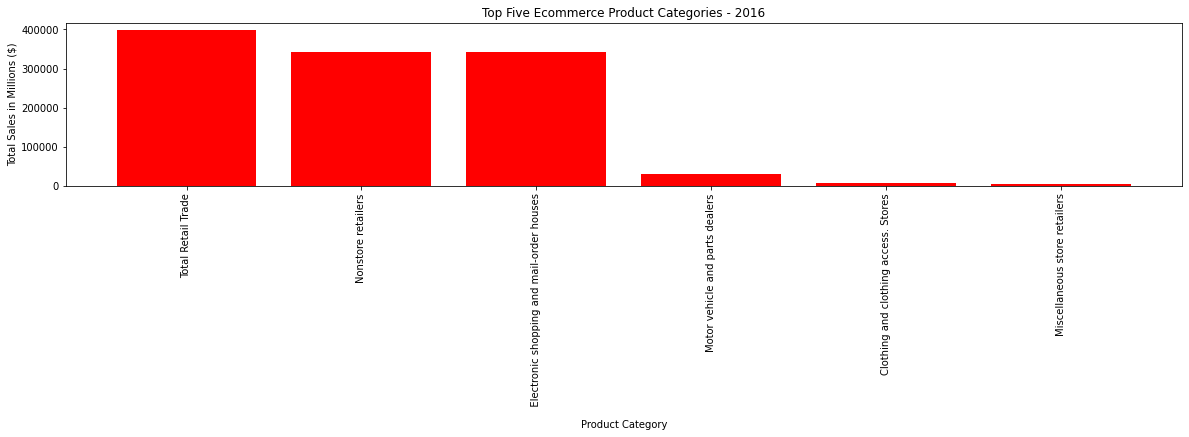

In [79]:
# Set x axis and tick locations
x_axis = np.arange(len(data_2016))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(20,3))
plt.bar(x_axis, data_2016["value"], color='r', alpha=1, align="edge")
plt.xticks(tick_locations, data_2016["Kind_of_Business"], rotation="vertical")

# Set a Title and labels
plt.title("Top Five Ecommerce Product Categories - 2016")
plt.xlabel("Product Category")
plt.ylabel("Total Sales in Millions ($)")
plt.savefig('Top Five Ecommerce Product Categories - 2016.png')

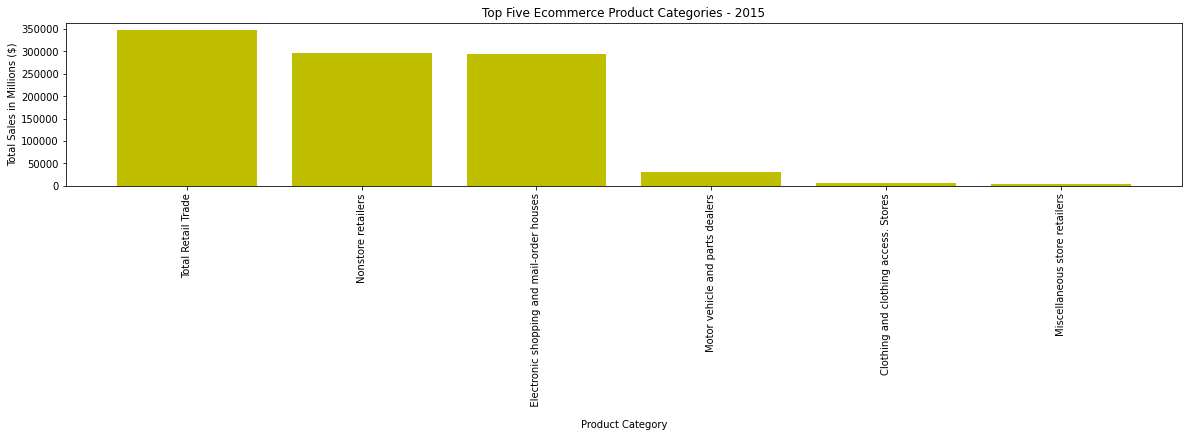

In [80]:
# Set x axis and tick locations
x_axis = np.arange(len(data_2015))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(20,3))
plt.bar(x_axis, data_2015["value"], color='y', alpha=1, align="edge")
plt.xticks(tick_locations, data_2015["Kind_of_Business"], rotation="vertical")

# Set a Title and labels
plt.title("Top Five Ecommerce Product Categories - 2015")
plt.xlabel("Product Category")
plt.ylabel("Total Sales in Millions ($)")
plt.savefig('Top Five Ecommerce Product Categories - 2015.png')

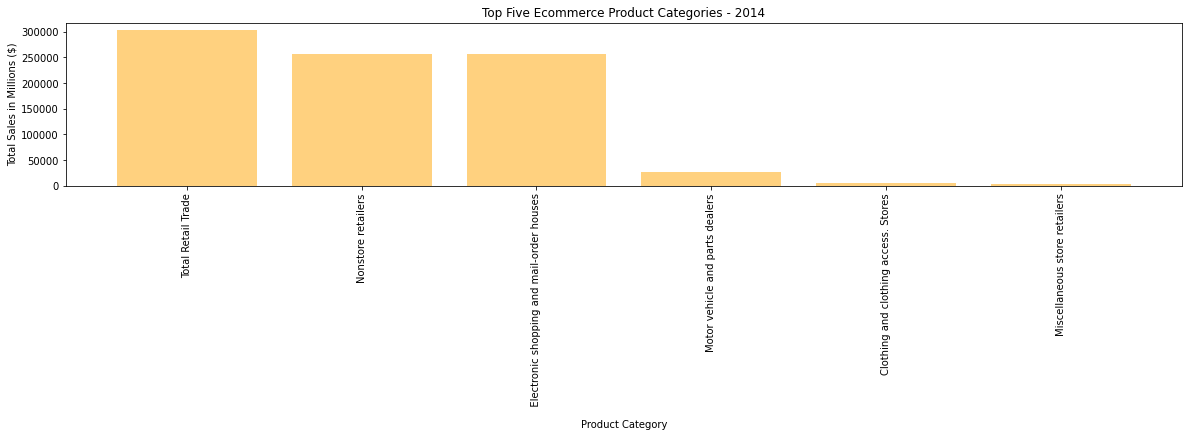

In [81]:
# Set x axis and tick locations
x_axis = np.arange(len(data_2014))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(20,3))
plt.bar(x_axis, data_2014["value"], color='orange', alpha=0.5, align="edge")
plt.xticks(tick_locations, data_2014["Kind_of_Business"], rotation="vertical")

# Set a Title and labels
plt.title("Top Five Ecommerce Product Categories - 2014")
plt.xlabel("Product Category")
plt.ylabel("Total Sales in Millions ($)")
plt.savefig('Top Five Ecommerce Product Categories - 2014.png')

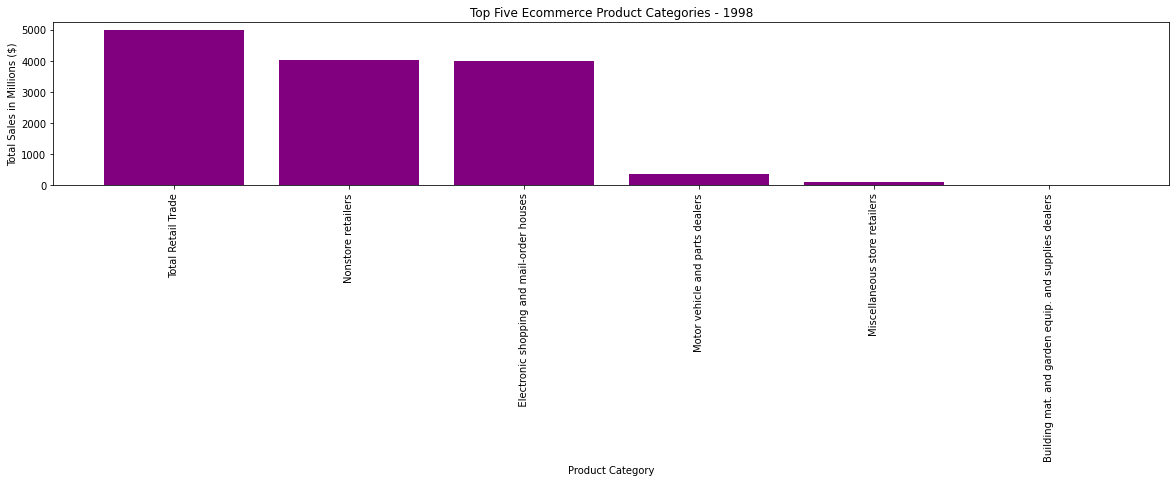

In [82]:
# Set x axis and tick locations
x_axis = np.arange(len(data_1998))
tick_locations = [value+0.4 for value in x_axis]


plt.figure(figsize=(20,3))
plt.bar(x_axis, data_1998["value"], color='purple', alpha=1, align="edge")
plt.xticks(tick_locations, data_1998["Kind_of_Business"], rotation="vertical")

# Set a Title and labels
plt.title("Top Five Ecommerce Product Categories - 1998")
plt.xlabel("Product Category")
plt.ylabel("Total Sales in Millions ($)")
plt.savefig('Top Five Ecommerce Product Categories - 1998.png')

- Misc. store retailers = Establishments primarily engaged in the retail sale of specialized lines of merchandise, not elsewhere classified, such as artists'supplies; orthopedic and artificial limbs; rubber stamps; pets; religious goods; and monuments and tombstones.
- E-Shopping & mail-order houses = This industry comprises establishments primarily engaged in retailing all types of merchandise using nonstore means, such as catalogs, toll free telephone numbers, or electronic media, such as interactive television or the Internet. Included in this industry are establishments primarily engaged in retailing from catalog showrooms of mail-order houses.

    - Catalog (i.e., order-taking) offices of mail-order houses, Collectors' items, mail-order houses, Computer software, mail-order houses, Home shopping television orders, Internet auction sites, retail, Mail-order book clubs (not publishing), Mail-order houses, Web retailers
    - Top Companies include - Amazon, Ebay, Wayfair, QVC

# State Plots

- Pennsylvania

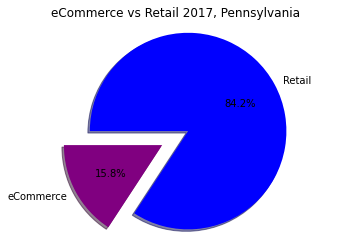

In [113]:
#Create Pie Chart
labels = "eCommerce", "Retail"
value = [PA_ecommerce_totals[1.0], PA_ecommerce_totals[0.0]]
colors = ["purple", "blue"]
explode = (0.3,0)

# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017, Pennsylvania")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")

-  Indiana Plot

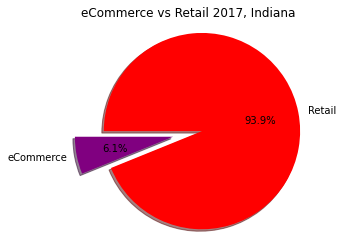

In [112]:
#Create Pie Chart
labels = "eCommerce", "Retail"
value = [IN_ecommerce_totals[1.0], IN_ecommerce_totals[0.0]]
colors = ["purple", "red"]
explode = (0.3,0)

# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017, Indiana")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")

- Arizona Plot

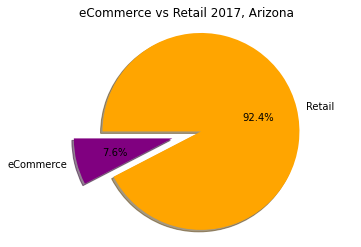

In [116]:
#Create Pie Chart
labels = "eCommerce", "Retail"
value = [my_results_AZ[1.0], my_results_AZ[0.0]]
colors = ["purple", "orange"]
explode = (0.3,0)

# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017, Arizona")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")

- California Plot

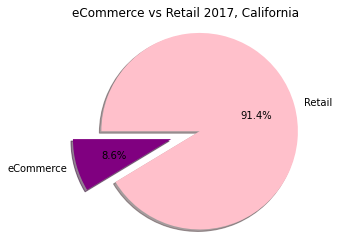

In [124]:
labels = "eCommerce", "Retail"
value = [CA_totals[1.0], CA_totals[0.0]]
colors = ["purple", "pink"]
explode = (0.3,0)

# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017, California")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")

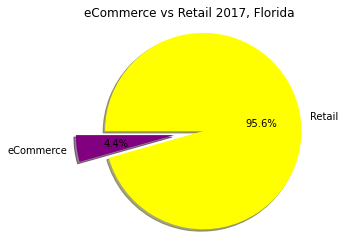

In [131]:
labels = "eCommerce", "Retail"
value = [my_resultsFL[1.0], my_resultsFL[0.0]]
colors = ["purple", "yellow"]
explode = (0.3,0)

# Create a pie chart based upon the above data
plt.pie(value, labels=labels, colors=colors, explode=explode,
        autopct="%1.1f%%", shadow=True, startangle=180)
plt.title("eCommerce vs Retail 2017, Florida")

# Create axes which are equal so we have a perfect circle
plt.axis("equal")
plt.show()
#plt.savefig("../Images/PyPies.png")